In [131]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")
import pandas as pd
import numpy as np
import warnings
import mlflow
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from modeling.config import EXPERIMENT_NAME
TRACKING_URI = open("../.mlflow_uri").read().strip()

warnings.filterwarnings('ignore')
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
# data
df=pd.read_csv("../data/train.csv")
df_test=pd.read_csv("../data/test.csv")


[nltk_data] Downloading package wordnet to /Users/kw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kw/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [118]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [158]:
print(df.shape)
df['comment_text'].nunique()

(159571, 8)


159571

In [119]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [153]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

159571

In [120]:
df.iloc[:,2:].mean()

toxic            0.095844
severe_toxic     0.009996
obscene          0.052948
threat           0.002996
insult           0.049364
identity_hate    0.008805
dtype: float64

<AxesSubplot:>

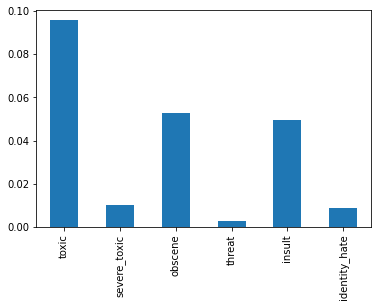

In [121]:
df.iloc[:,2:].mean().plot(kind='bar')

Categories are not mutually exclusive

In [122]:
df.iloc[:,2:].sum(axis=1).unique()

array([0, 4, 1, 3, 2, 5, 6])

Compare Categories to Toxic-Classification

In [123]:
df['toxic_compare'] = df.iloc[:,3:8].sum(axis = 1)#.to_frame().tolist()
df.loc[df['toxic_compare'] > 0,'toxic_compare'] = 1
np.mean(df.toxic == df.toxic_compare)

0.9586579014983926

In [125]:
(df.toxic - df.toxic_compare).value_counts()

 0    152974
 1      5666
-1       931
dtype: int64

Categories don't always overlap.


## Define X and y and split

In [78]:
X = df.pop('comment_text')
y = df.pop('toxic')

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: toxic, dtype: int64


In [126]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.3)
Encoder = LabelEncoder()
# Make Labels
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

## Count Vectorizer

In [127]:
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
print("X_train_vectorized: ")
print(X_train_vectorized)

X_train_vectorized: 
  (0, 2281)	2
  (0, 8245)	1
  (0, 9225)	1
  (0, 11571)	1
  (0, 12116)	1
  (0, 12648)	1
  (0, 14424)	1
  (0, 15546)	1
  (0, 16186)	1
  (0, 19685)	1
  (0, 21033)	1
  (0, 25877)	1
  (0, 26035)	1
  (0, 31426)	1
  (0, 32862)	1
  (0, 33740)	1
  (0, 35394)	1
  (0, 35516)	1
  (0, 35543)	1
  (0, 42231)	1
  (0, 43678)	1
  (0, 43993)	1
  (0, 46394)	1
  (0, 46618)	2
  (0, 46764)	1
  :	:
  (111698, 71425)	1
  (111698, 71626)	1
  (111698, 83066)	1
  (111698, 86013)	2
  (111698, 89955)	1
  (111698, 91331)	1
  (111698, 91663)	1
  (111698, 95358)	2
  (111698, 95633)	1
  (111698, 96921)	1
  (111698, 113820)	1
  (111698, 114093)	1
  (111698, 122436)	1
  (111698, 124870)	1
  (111698, 128293)	1
  (111698, 133848)	1
  (111698, 133955)	1
  (111698, 134165)	2
  (111698, 135802)	2
  (111698, 142237)	1
  (111698, 143577)	1
  (111698, 143594)	1
  (111698, 145070)	1
  (111698, 146095)	1
  (111698, 150404)	1


(index in X, index of unique word): occurrence

Unique Words and their indices:

In [92]:
vect.vocabulary_


{'are': 14868,
 'you': 150165,
 'sure': 130242,
 'the': 133795,
 'name': 92142,
 'of': 96918,
 'mabe': 82797,
 'village': 143488,
 'is': 71244,
 'based': 19228,
 'on': 97578,
 'word': 148270,
 'maybe': 85540,
 'it': 71589,
 'doesn': 43376,
 'really': 111342,
 'seem': 120189,
 'much': 90783,
 'like': 80435,
 'does': 43371,
 'that': 133750,
 'just': 74173,
 'my': 91554,
 'opinion': 97969,
 'don': 43593,
 'want': 144862,
 'to': 135636,
 'delete': 39465,
 'incase': 68335,
 'true': 137682,
 'll': 81212,
 'edit': 45990,
 'when': 146187,
 'find': 53128,
 'some': 125286,
 'evidence': 49806,
 'supporting': 130144,
 'flight': 53760,
 've': 142591,
 'read': 111229,
 'about': 8092,
 'peafowl': 101658,
 'being': 20221,
 'able': 8022,
 'fly': 53999,
 'reach': 111202,
 'trees': 137136,
 'sleep': 124046,
 'in': 68190,
 'for': 54325,
 'example': 50001,
 'but': 25745,
 'aren': 14890,
 'cocks': 31706,
 'inhibited': 69408,
 'by': 25884,
 'their': 133970,
 'trains': 136661,
 'matter': 85313,
 'how': 65641,

## TfidfVectorizer

In [132]:
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 15
# This means a word should have been used in at least 15 SMS 
vect = TfidfVectorizer(min_df=15).fit(X_train)

# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

# let's look of some of the words gathered with this method
sorted(vect.vocabulary_.items(), key=lambda x: x[1])[500:510]

[('abortion', 500),
 ('abortions', 501),
 ('about', 502),
 ('above', 503),
 ('abraham', 504),
 ('abrahamic', 505),
 ('abrasive', 506),
 ('abroad', 507),
 ('absence', 508),
 ('absent', 509)]

(word, index)

## Lemmatization

In [133]:
# Initialization
nltk.download('wordnet')
nltk.download('omw-1.4')
WNlemma = nltk.WordNetLemmatizer()
#analyzer = CountVectorizer().build_analyzer()
analyzer = TfidfVectorizer(min_df=1).build_analyzer()

def lemmatize_word(doc):
    return (WNlemma.lemmatize(t) for t in analyzer(doc))

#lemm_vectorizer = CountVectorizer(analyzer=lemmatize_word)
lemm_vectorizer = TfidfVectorizer(min_df=1, analyzer=lemmatize_word)

# Transform X_train
X_train_lemm_vectorized = lemm_vectorizer.fit_transform(X_train)

[nltk_data] Downloading package wordnet to /Users/kw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kw/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [134]:
X_train_lemm_vectorized.shape

(111699, 144551)

In [148]:
print(X_train_lemm_vectorized)
# let's look of some of the words gathered with this method
sorted(lemm_vectorizer.vocabulary_.items(), key=lambda x: x[1])[500:510]

  (0, 124179)	0.054128738562137256
  (0, 126018)	0.036637448262929834
  (0, 92161)	0.1638388850761638
  (0, 33682)	0.10141208614067083
  (0, 114172)	0.09751106263782336
  (0, 108503)	0.07795984519353659
  (0, 123127)	0.17548840296935067
  (0, 54150)	0.09984447053743528
  (0, 39960)	0.20361739835230844
  (0, 139265)	0.15908881096471528
  (0, 43863)	0.1477832273318086
  (0, 31251)	0.13712280725306447
  (0, 24941)	0.05432195966139286
  (0, 107668)	0.10328151520980412
  (0, 44218)	0.1301644668230186
  (0, 136205)	0.05174213582130525
  (0, 135963)	0.11590957524629071
  (0, 32057)	0.14305578256336846
  (0, 29942)	0.13763387883279526
  (0, 61917)	0.06614472686818265
  (0, 72538)	0.06502466904710358
  (0, 41312)	0.06176943607147921
  (0, 126876)	0.08014325781931798
  (0, 81991)	0.09499715357845281
  (0, 127805)	0.05948099469425175
  :	:
  (111698, 78443)	0.12450139967417409
  (111698, 141682)	0.05455388890465438
  (111698, 14564)	0.07360012980705137
  (111698, 63357)	0.07580986454742801
  (111

[('0cfuq6aewbw', 500),
 ('0cfwq6aewcq', 501),
 ('0cgaq6aewca', 502),
 ('0e394f018fc9ff00vgnvcm1000002c567798rcrd', 503),
 ('0em', 504),
 ('0f', 505),
 ('0f78', 506),
 ('0fb3382ee6ad1e46', 507),
 ('0h', 508),
 ('0j0i10l9', 509)]

In [141]:
sorted(lemm_vectorizer.vocabulary_)

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '00000001',
 '000001',
 '000002',
 '000002000004000008000016',
 '0000030422',
 '0000035',
 '000023405011',
 '00004',
 '000045',
 '00007632',
 '000080',
 '00008b',
 '00009c',
 '0000z',
 '0001',
 '00012',
 '000131088',
 '0002tree',
 '0003',
 '000352',
 '0004',
 '000500',
 '0006',
 '000_bucks',
 '000b01c5b9f8',
 '000feet',
 '000ft',
 '000http',
 '000hz',
 '000k',
 '000km',
 '000lb',
 '000poland2',
 '000s',
 '000shp',
 '000soviet',
 '000th',
 '000unknownunknown',
 '000unknownunknownhungary',
 '000unknownunknownitaly',
 '000unknownunknownromania3',
 '000unknownunknowntotal',
 '000v',
 '000z',
 '001',
 '0010',
 '0011',
 '001200405140111',
 '0014',
 '00144feab7de',
 '0015',
 '0016',
 '0018',
 '002',
 '0020143',
 '00242',
 '0025',
 '00262',
 '002912',
 '00293',
 '003',
 '0032',
 '00336',
 '0034',
 '003417',
 '003_resize',
 '004',
 '00402',
 '0042',
 '0049703',
 '005',
 '005003',
 '005113',
 '005176',
 '0052',
 '0055',
 '0055bb',
 '0058',
 '006',
 '

One example word

In [138]:
lemm_vectorizer.get_feature_names()[50321]

'firday'

--> We may need to correct for spelling errors

Let's look at rare words

In [150]:
# lowest occurrences
sort(X_train_lemm_vectorized)

NameError: name 'sort' is not defined

In [142]:
def get_term(dict, search_index):
    return list(dict.keys())[list(dict.values()).index(search_index)]

get_term(lemm_vectorizer.vocabulary_, 8)

'000002000004000008000016'

In [ ]:
def get_term(dict, search_index):
    return list(dict.keys())[list(dict.values()).index(search_index)]
#get_term(vectorizer.vocabulary_, 8)


In [85]:
print("X_train shape = {}".format(X_train.shape))
print("Vocabulary length = {}".format(len(vect.vocabulary_)))

X_train shape = (111699,)
Vocabulary length = 153049


In [86]:
sorted(vect.vocabulary_.items(), key=lambda x: x[1])[:20]
print(X_train_vectorized.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## First Models

In [87]:
# Train the model
model = LogisticRegression(max_iter=1500)
model.fit(X_train_vectorized, y_train)

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print("AUC = {:.3f}".format(roc_auc_score(y_test, predictions)))

AUC = 0.829


In [88]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model (from lowest to highest values)
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1]
# so the list returned is in order of largest to smallest
print("Smallest Coefs:\n{}\n".format(feature_names[sorted_coef_index[:10]]))
print("Largest Coefs: \n{}".format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['supertr0ll' 'swift' 'showing' 'beardy' 'victoria' 'meta' 'interested'
 'weve' 'kinda' 'talkpage']

Largest Coefs: 
['fuck' 'fucking' 'idiot' 'bullshit' 'suck' 'fucked' 'asshole' 'shit'
 'faggot' 'stupid']
